In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [ ]:
df=pd.read_csv("/content/sample_data/t20-world-cup-22.csv")
df

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,NaN,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
8,MCG,New Zealand,Afghanistan,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10


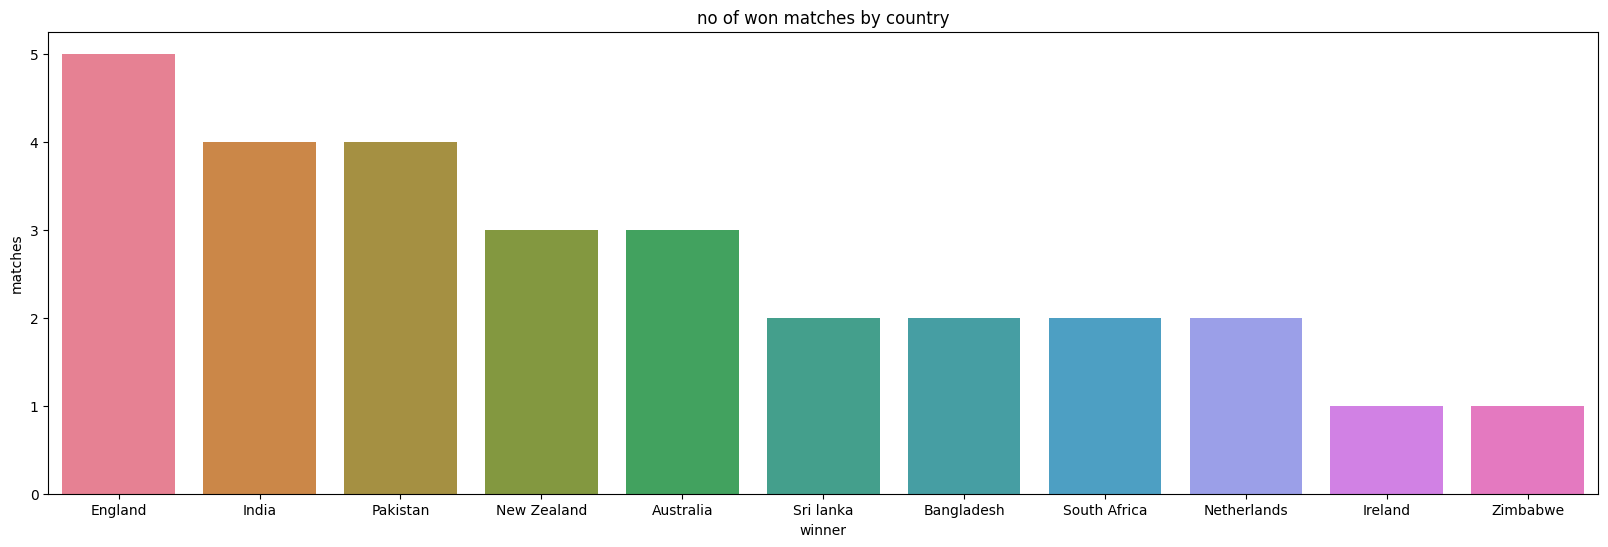

In [ ]:
df_winner=df['winner'].value_counts()
df_winner
df_winner=pd.DataFrame({"winner":df_winner.index,"matches":df_winner.values})
df_winner
plt.figure(figsize=(20,6))
sns.barplot(x='winner',y='matches',data=df_winner,hue='winner')
plt.title("no of won matches by country")
plt.show()

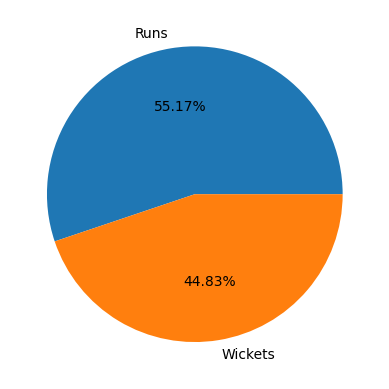

In [ ]:
df_by=df['won by'].value_counts()
df_by=pd.DataFrame({'won by':df_by.index,'count':df_by.values})
df_by
plt.pie(df_by['count'],labels=df_by['won by'],autopct="%.2f%%")
plt.show()

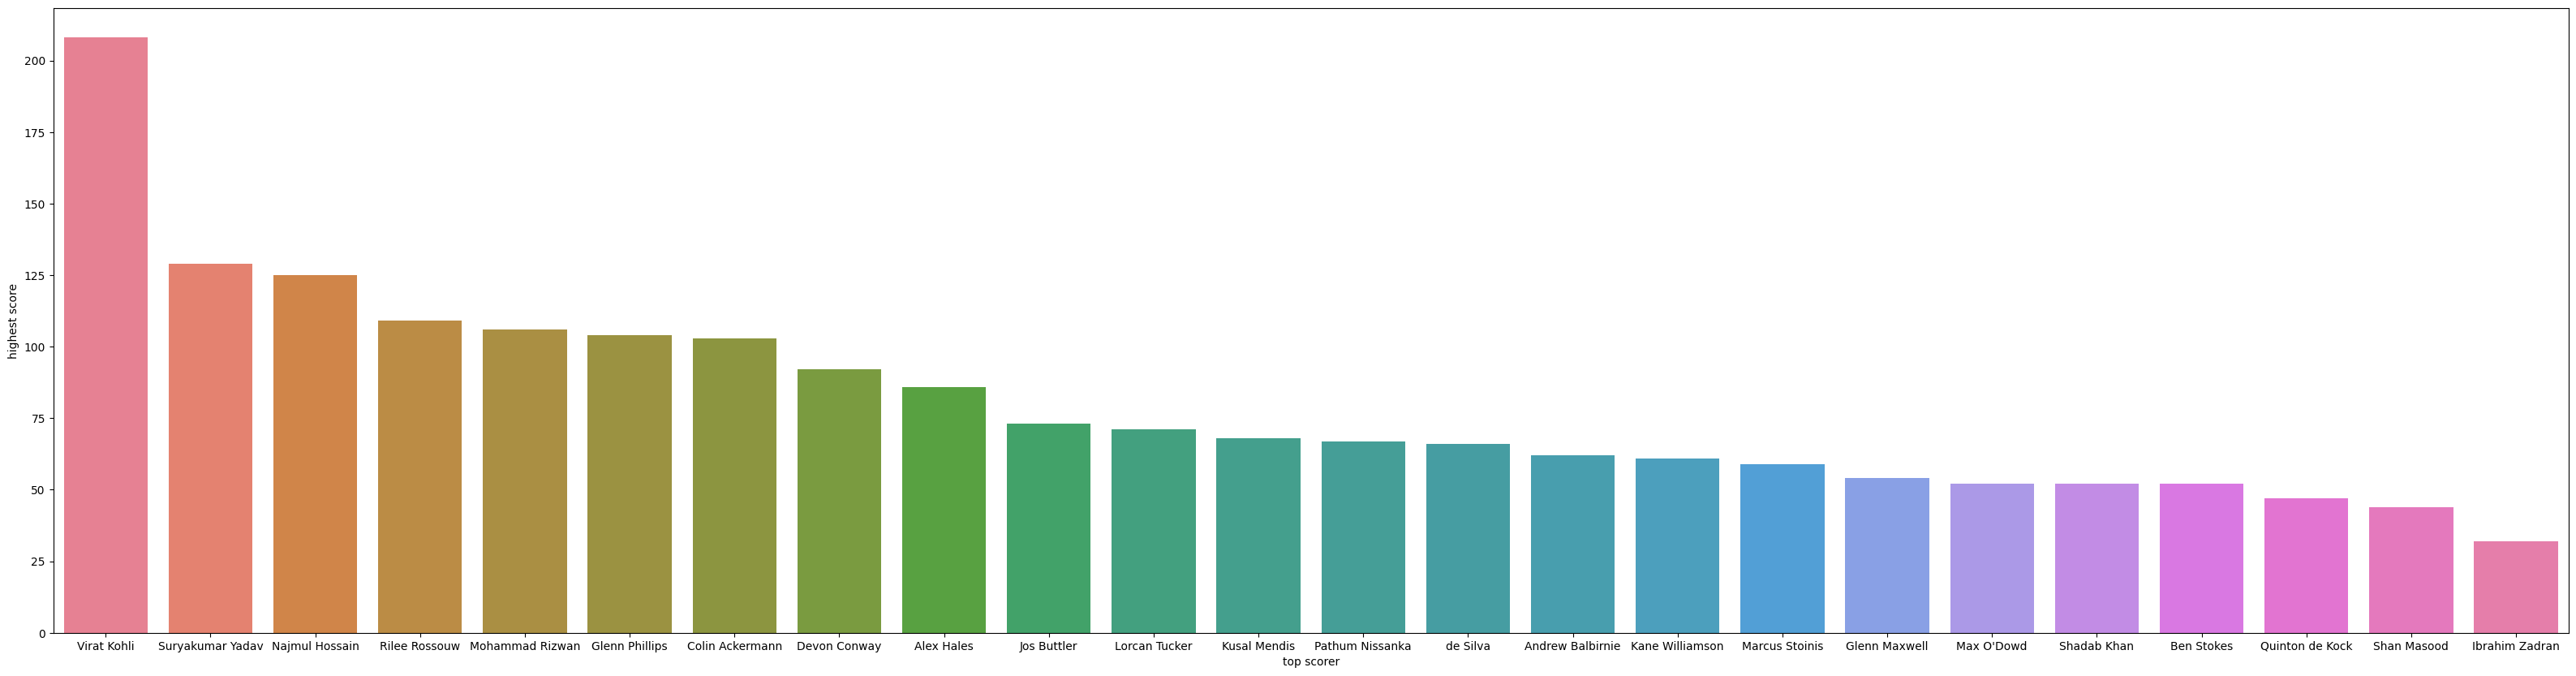

In [ ]:
df_top_runs=df.groupby('top scorer',as_index=False)['highest score'].sum()
df_top_runs=df_top_runs.sort_values(by='highest score',ascending=False)
df_top_runs
plt.figure(figsize=(40,10))
sns.barplot(x='top scorer',y='highest score',data=df_top_runs,hue='top scorer')
plt.show()

In [ ]:
df_comp=df.groupby('venue',as_index=False).aggregate({'first innings score':'sum','second innings score':"sum"})
df_comp

,venue,first innings score,second innings score
0,Adelaide Oval,1107.0,1022.0
1,Blundstone Arena,351.0,319.0
2,MCG,639.0,518.0
3,Optus Stadium,623.0,632.0
4,SCG,1229.0,842.0
5,The Gabba,652.0,591.0


In [ ]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df_comp['venue'],y=df_comp['first innings score'],name='first innings score'))
fig.add_trace(go.Bar(x=df_comp['venue'],y=df_comp['second innings score'],name='second innings score'))
fig.show()